# CS 6320 Project 2: Detecting Lines and Circles using Hough Transform

A notebook contains many blocks of code, each of which can be run independently. You can run a cell with ctrl+enter or shift+enter (to move to the next cell).


You are expected to complete this notebook with lines of code, plots and texts. You will need to create new cells with original code or text for your analyses and explanations. Explain what you do and analyze your results. This assignment has a total of 100 points.

## Brief
    Hand-in: through Gradescope
    Required files: <your_uid>.zip.(Please begin with 'u' for your uid)
<!---<your_uid>_proj1.pdf--> 


## Setup

   0. Unzip proj2_6320.zip and go to proj2_6320 directory.
      - You can run `unzip proj2_6320.zip && cd proj2_6320` in your terminal.
   1. Install [Miniconda](https://docs.conda.io/en/latest/miniconda.html). It doesn’t matter whether you use Python 2 or 3 because we will create our own environment that uses 3 anyways.
   2. Create a conda environment using the appropriate command. On Windows, open the installed “Conda prompt” to run the command. On MacOS and Linux, you can just use a terminal window to run the command, Modify the command based on your OS (linux, mac, or win): `conda env create -f proj2_env_<OS>.yml`.
    - NOTE that proj2_env.yml is inside the project folder.
   3. This should create an environment named ‘proj2’. Activate it using the Windows command, activate proj2 or the MacOS / Linux command, source activate proj2
   4. Run the notebook using `jupyter notebook` under *proj2_6320* directory.
   5. Ensure that all sanity checks are passing by running pytest tests inside the repo folder.
   6. Generate the zip folder for the code portion of your submission once you’ve finished the project using 
    
        `python zip_submission.py --uid <your_uid>` 


## Library Functions
Do not use any library functions that implement Hough Transform in your solution. You can use functions to perform fitlering etc.

## Debugging
We have included several synthetic images of lines and circles to help test your methods in simpler domains if you'd like.

## Writeup
For this project, this notebook itself is the report. You must run all your cells before you hand in it. You code, results, visualization, and discussion will be used for the grading. You will be deducted points if the results are not shown in this notebook. Do not change the order of the cells. You can add cells in need. You can copy a cell and run it seperately if you need to run a cell multiple times and thus every result is displayed in the cell.


## Rubric
    +26 pts: Ques_1
    +12 pts: Ques_2
    +15 pts: Ques_3
    +17 pts: Ques_4
    +15 pts: Ques_5
    +15 pts: Ques_6

    Distribution of the points in a Question is separately mentioned for each sub-task

    -5*n pts: Lose 5 points for every time you do not follow the instructions for the hand-in format.
    
Submission Format

This is very important as you will lose 5 points for every time you do not follow the instructions. You will attach two items in your submission on Canvas:

1. <your_uid>.zip containing:
    - proj2_code/ - directory containing all your code for this assignment
    - data/       - directory containing all the input images
    - results/    - directory containing all your output images

Do not install any additional packages inside the conda environment. The TAs will use the same environment as defined in the config files we provide you, so anything that’s not in there by default will probably cause your code to break during grading. Do not use absolute paths in your code or your code will break. Use relative paths like the starter code already does. Failure to follow any of these instructions will lead to point deductions. Create the zip file using python zip_submission.py --uid <your_uid> (it will zip up the appropriate directories/files for you!)

In [1]:
import numpy as np
import cv2 as cv
import matplotlib
import matplotlib.pyplot as plt
import math

### 1 Processing an image to detect lines using Hough Transform (26 points)

In this question, we process an image and apply Hough Transform on the processed image

#### Tasks:
1. Compute a smooth version of the Input Image <b>(4 points)</b>
2. Detect edges from Images <b>(6 points)</b>
3. Implement Hough Transform <b>(8 points)</b>
4. Apply Hough Transform to detect lines from images <b>(4 points)</b>
5. Apply Hough Transform to detect edges from images <b>(4 points)</b>

#### 1.1 Compute a smooth version of the Input Image

##### You should use a Gaussian filter to generate a smooth image 

##### Please note:
The function takes in as input only the sigma value (integer only).<br>
The size of the filter should be computed using the sigma value

In [2]:
def Gaussian_Filter(sigma):
    '''
    The function takes in as input only the sigma
    and generates a filter using the sigma value
    The size of the filter should be computed using the sigma value
    '''

    ##############################
    # TO DO: Your Implementation
    ##############################
    g_size = int(2*np.ceil(3*sigma)+1)
    
    g_x, g_y = np.meshgrid(np.arange(-(g_size//2)+1, (g_size//2)+1), np.arange(-(g_size//2)+1, (g_size//2)+1))
    g_x = g_x**2
    g_y = g_y**2
    filter = np.exp(-(g_x+g_y)/(2*sigma**2))
    
    filter = filter/np.sum(filter)
    
    return filter
    ################################
    # Your Implementation ENDS here
    ################################

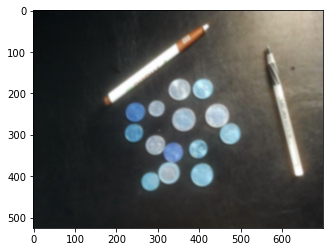

In [3]:
# Reading the Input Image
img        = cv.imread('../data/proj2-clean-image.jpg')

# Generates the Gaussian Filter
g_kernel   = Gaussian_Filter(2)

# Smoothing the image with the Gaussian Filter
smooth_img = cv.filter2D(img, -1, g_kernel)

# Saves the Smooth Image in the result directory
cv.imwrite("../results/Ques_1/proj2-clean-image-smoothed.png", smooth_img)

# Plots the smoothed image in the notebook
plt.figure(); plt.imshow(smooth_img.astype(np.uint8));

In [4]:
def rgb2gray(rgb):
    '''
    Converts the RGB image to the Gray Scale
    '''

    return np.dot(rgb[..., :3], [0.299, 0.587, 0.114])

In [5]:
def image_uint(input_arr):
    '''
    Scales the image intensity values to the range [0, 255]
    '''

    return (255.0*(input_arr - np.min(input_arr))/(np.max(input_arr) - np.min(input_arr))).astype(np.uint8)

#### 1.2 Edge Detector
Now we need to extract the edges from the input images. This is as essential step towards detection of lines and circles from the image.

#### You should define a Sobel filter to detect edges in the Original and Smooth Image
Following the definition of the filter, you convolve the filter over the input image using OpenCV library function, <b>filter2D()</b>. You are not required to write any convolution function to apply the filter.

You are required to detect edges on both the <b>original</b> and <b>smooth</b> images.

<b>Do you observe any difference between them? Please comment in a separate cell.</b>

#### 1.2.1 Edge Detector on the Original Image
Please remember the edge detection method should be applied on <b>gray images</b>.
The edge image should be saved as <b>img_gray_edge</b>.

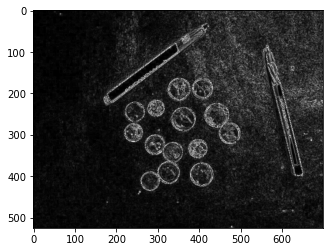

In [6]:
##############################
# TO DO: Your Implementation
##############################
img_gray = rgb2gray(img)

sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array(np.fliplr(sobel_x).transpose())

img_gray_x = cv.filter2D(img_gray, -1, sobel_x)
img_gray_y = cv.filter2D(img_gray, -1, sobel_y)

img_gray_edge = np.sqrt(img_gray_x**2 + img_gray_y**2)

################################
# Your Implementation ENDS here
################################

# Save the Image
cv.imwrite('../results/Ques_1/Ori_Clean_Edge_Image.png', img_gray_edge)

#Plot the Image
plt.figure(); plt.imshow(img_gray_edge.astype(np.uint8), cmap='gray');

#### 1.2.2 Edge Detector on the Smooth Image
Please remember the edge detection method should be applied on <b>gray images</b>.
The edge image should be saved as <b>smooth_img_gray_edge</b>.

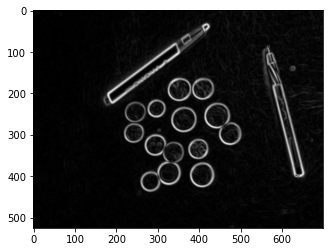

In [7]:
##############################
# TO DO: Your Implementation
##############################
img_smooth = rgb2gray(smooth_img)
img_smooth_x = cv.filter2D(img_smooth, -1, sobel_x)
img_smooth_y = cv.filter2D(img_smooth, -1, sobel_y)

smooth_img_gray_edge = np.sqrt(img_smooth_x**2 + img_smooth_y**2)

################################
# Your Implementation ENDS here
################################

# Save the Image
cv.imwrite('../results/Ques_1/Smooth_Clean_Edge_Image.png', smooth_img_gray_edge)

#Plot the Image
plt.figure(); plt.imshow(smooth_img_gray_edge.astype(np.uint8), cmap='gray');

Answer:- When the edge detector is applied on the original image and the smooth image, edges are highlighted by the white pixel. We can see from the plots above that the smotoh image generates a better and sharper image with prominent edges of the pen ad the coins. The original edge image also shows clear edges but are not as sharp as the smooth image. There are some white pixels spreadout in the original edge image which might introduce some distortion.

#### 1.3 Hough Transform to detect Lines
In this exercise you are expected to implement Hough Transform for line detection as discussed in class. Hough Transform uses an accumulator array to capture the lines present in image. It is applied on binary images which can be generated by thresholding the edge detector output.<br>

For this exercise, the range of theta is <b>[-90, 90]</b> and the range of rho is <b>[-img_diag, img_diag]</b>.

In [8]:
def hough_transform(input_img, threshold, theta_res, rho_res):

    '''
    This function computes the Accumulator array
    
    Input:
    1. Output of the Edge Detection Method
    2. Threshold value for generating the binary image
    3. Resolution for Angle
    4. Resolution for Perpendicular Distance from the Origin (Rho)
    
    Output:
    1. Accumulator array       , declare as accumulator
    2. Array of Theta          , declare as thetas
    3. Array of Rho            , declare as rhos
    4. Thresholded Binary Image, declare as binary_img

    '''

    ##############################
    # TO DO: Your Implementation
    ##############################
    binary_img = (input_img > threshold).astype(int)
    height, width = binary_img.shape[:2] 
    img_diagonal = np.ceil(np.sqrt(height**2 + width**2))
    rhos = np.arange(-img_diagonal, img_diagonal + 1, rho_res)
    thetas = np.deg2rad(np.arange(-90, 90, theta_res))


    accumulator = np.zeros((len(rhos), len(thetas)), dtype=np.uint64)
    if len(binary_img.shape)>2:
        y_idx, x_idx, _ = np.nonzero(binary_img)     

    else:
        y_idx, x_idx = np.nonzero(binary_img)

    for i in range(len(x_idx)): 
        x = x_idx[i]
        y = y_idx[i]

        for j in range(len(thetas)): 
            rho = int((x * np.cos(thetas[j]) +
                       y * np.sin(thetas[j])) + img_diagonal)
            accumulator[rho, j] += 1
    

    ################################
    # Your Implementation ENDS here
    ################################

    return accumulator, thetas, rhos, binary_img



#### 1.3.1 Hough Transform to detect Lines from Original Image

Use the edges detected from the <b>original input image</b> to apply Hough Transform function.<br>
<br>

You need to find a resaonable estimate of the threshold for generating the binary image which is good enough for the Hough transform to extract lines. Please discuss the effect of the threshold on the performance of the algorithm.

Plot the Accumulator Array using the matplotlib function, figure size (20, 20), with proper labeling and title. The image should be saved as <b>Ori_Clean_Image_Accumulator_Array.png</b> in results/Ques_1 sub-directory.


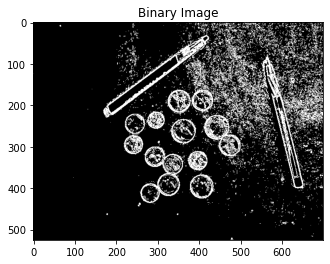

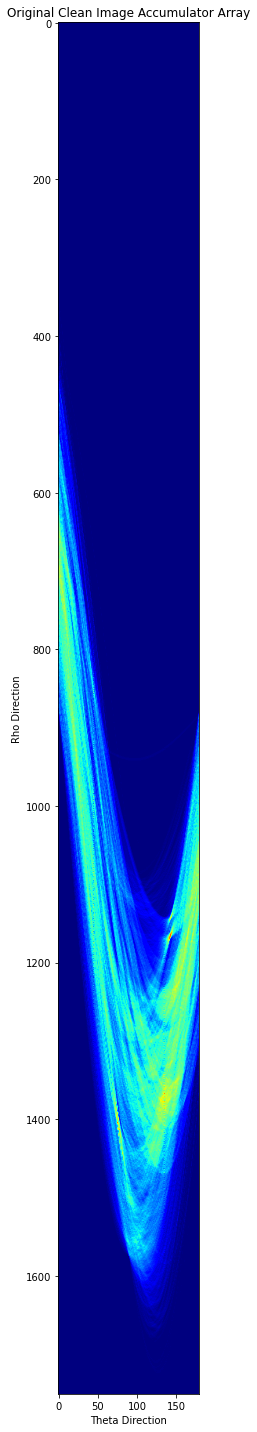

<Figure size 432x288 with 0 Axes>

In [19]:
# Invoke the Hough Transform Method to Extract the Lines from the Image
# You need to find a resaonable estimate of the threshold for generating a binary image
# which is good enough for the Hough transform to extract the lines
# To expedite the process you can play with the resolution of the theta and rho 
# without compromising the quality of the results

ori_accumulator, ori_thetas, ori_rhos, ori_binary_img = hough_transform(img_gray_edge, 60, 1.0, 1.0)

# Save the Thresholded Binary Image
cv.imwrite('../results/Ques_1/Ori_Clean_Binary_Image.png', ori_binary_img)

#Plot the Binary Image
plt.figure(); plt.imshow(ori_binary_img.astype(np.uint8), cmap='gray'); plt.title('Binary Image')


# Plot Accumulator Array
##############################
# TO DO: Your Implementation
##############################
fig = plt.figure(figsize=(20, 20))

plt.imshow(ori_accumulator, cmap='jet')
plt.title("Original Clean Image Accumulator Array")
plt.xlabel('Theta Direction'), plt.ylabel('Rho Direction')
plt.tight_layout()
plt.show()
plt.savefig("../results/Ques_1/Ori_Clean_Image_Accumulator_Array.png")
################################
# Your Implementation ENDS here
################################

Answer -: The threshold affects the performance of the algorithm by determining the quality of the binary image which is used as the input to the Hough Transform. A high threshold will result in a binary image with fewer edges, which will lead to fewer lines being detected by the Hough Transform. Similarly, a low threshold will result in a binary image with more edges, which will lead to more lines being detected by the Hough Transform. It is important to find an optimal balance between the two: if the threshold is too high, the quality of the lines detected by the Hough Transform will be poor; if the threshold is too low, the algorithm may be overwhelmed by the number of edges detected in the binary image.

In the Original Edge Image, the threshold is kept high at 60 to clearly detect the edges of the pens. A lower threshold introduces unnecessary lines and a higher threshold distorts the image and is not able to detect the edges.

For plotting lines (infinite) in the images, you should use the OpenCV <b>line</b> function which can hold all the lines and then you could overlay them on the input image.

In [75]:
def plot_lines(img_path, accumulator, thetas, rhos, acc_threshold, save_path):

    '''
    This function plots infinite lines
    This should be used to draw lines along the boundary of the pens
    
    Input:
    1. RGB Image for plotting lines
    2. Accumulator array
    3. Vector of the angle values
    4. Vector of the rho values
    5. Threshold value for selecting lines from the accumulator
    6. Path to save the image with lines drawn on them
    
    Output:
    Returns Nothing
    Saves the output image in save_path
    '''

    ##############################
    # TO DO: Your Implementation
    ##############################
    img = cv.imread(img_path)
    indexes = []
    nhood_size=20
    acc1 = np.copy(accumulator)
    for i in range(acc_threshold):
        idx = np.argmax(acc1) 
        acc1_idx = np.unravel_index(idx, acc1.shape)
        indexes.append(acc1_idx)

        idx_y, idx_x = acc1_idx 

        if (idx_x - (nhood_size/2)) < 0: 
            min_x = 0
        else: 
            min_x = idx_x - (nhood_size/2)
            
        if ((idx_x + (nhood_size/2) + 1) > accumulator.shape[1]): 
            max_x = accumulator.shape[1]
        else: 
            max_x = idx_x + (nhood_size/2) + 1

        if (idx_y - (nhood_size/2)) < 0: 
            min_y = 0
        else: 
            min_y = idx_y - (nhood_size/2)
            
        if ((idx_y + (nhood_size/2) + 1) > accumulator.shape[0]): 
            max_y = accumulator.shape[0]
        else: 
            max_y = idx_y + (nhood_size/2) + 1

        for x in range(int(min_x),int(max_x)):
            for y in range(int(min_y), int(max_y)):
                acc1[y, x] = 0

                if (x == min_x or x == (max_x - 1)):
                    accumulator[y, x] = 255
                if (y == min_y or y == (max_y - 1)):
                    accumulator[y, x] = 255
                    
    for i in range(len(indexes)):
        rho = rhos[indexes[i][0]]
        theta = thetas[indexes[i][1]]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho

        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        

    cv.imwrite(save_path, img)

    ################################
    # Your Implementation ENDS here
    ################################

In [76]:
# Plot the Lines extracted on the Original Image
# Play with the Accumulator Thresholding to get rid of the unwanted lines
acc_threshold=10
plot_lines('../data/proj2-clean-image.jpg', ori_accumulator, ori_thetas, ori_rhos, acc_threshold, save_path='../results/Ques_1/Ori_Clean_Image_Output_Lines.png')


#### 1.3.2 Hough Transform to detect Lines from the Smooth Image

Use the edges detected from the <b>smooth input image</b> to apply Hough Transform function.<br>
<br>

You need to find a resaonable estimate of the threshold for generating the binary image which is good enough for the Hough transform to extract lines. Please discuss the effect of the threshold on the performance of the algorithm.

Plot the Accumulator Array using the matplotlib function, figure size (20, 20), with proper labeling and title. The image should be saved as <b>Smooth_Clean_Image_Accumulator_Array.png</b> in results directory.

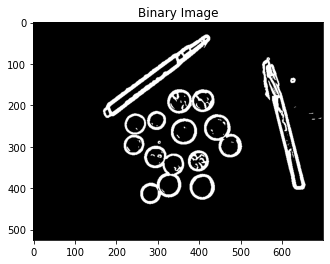

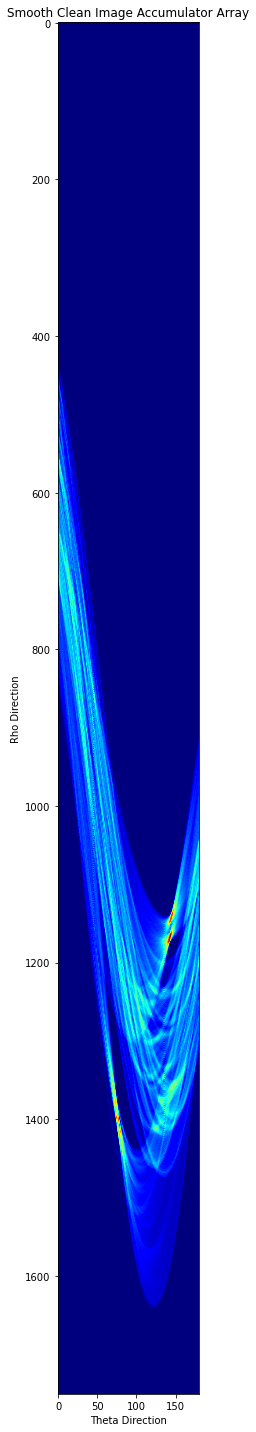

<Figure size 432x288 with 0 Axes>

In [24]:
# Invoke the Hough Transform Method to Extract the Lines from the Image
# You need to find a resaonable estimate of the threshold for generating a binary image
# which is good enough for the Hough transform to extract the lines
# To expedite the process you can play with the resolution of the theta and rho 
# without compromising the quality of the results

smooth_accumulator, smooth_thetas, smooth_rhos, smooth_binary_img = hough_transform(smooth_img_gray_edge, 40, 1.0, 1.0)

# Save the Thresholded Binary Image
cv.imwrite('../results/Ques_1/Smooth_Clean_Binary_Image.png', smooth_binary_img)

#Plot the Binary Image
plt.figure(); plt.imshow(smooth_binary_img.astype(np.uint8), cmap='gray'); plt.title('Binary Image') 

##############################
# TO DO: Your Implementation
##############################

fig = plt.figure(figsize=(20, 20))

plt.imshow(smooth_accumulator, cmap='jet')
plt.title("Smooth Clean Image Accumulator Array")
plt.xlabel('Theta Direction'), plt.ylabel('Rho Direction')
plt.tight_layout()
plt.show()
plt.savefig("../results/Ques_1/Smooth_Clean_Image_Accumulator_Array.png")

################################
# Your Implementation ENDS here
################################

Answer -: The threshold affects the performance of the algorithm by determining the quality of the binary image which is used as the input to the Hough Transform. A high threshold will result in a binary image with fewer edges, which will lead to fewer lines being detected by the Hough Transform. Similarly, a low threshold will result in a binary image with more edges, which will lead to more lines being detected by the Hough Transform. 
<br>
<br>
In the Smooth Edge Image, a low threshold of 40 is used which is better than that of the Original Edge Image which perfectly detects the 4 edges of the pens. 

In [77]:
acc_threshold=4
plot_lines('../results/Ques_1/proj2-clean-image-smoothed.png', smooth_accumulator, smooth_thetas, smooth_rhos, acc_threshold, save_path='../results/Ques_1/Smooth_Clean_Image_Output_Lines.png')


## 1.4 Hough Transform to detect Edges

Plot the Edges instead of Lines (infinite) along the boundary of the pens.

you should use the OpenCV <b>line</b> function which can hold all the edges and you could then overlay them on the input image.

In [46]:
def plot_edges(img_path, accumulator, thetas, rhos, acc_threshold, binary_image, save_path):

    '''
    This function plots edges
    This should be used to draw edges along the boundary of the pens
    
    Input:
    1. RGB Image for plotting lines
    2. Accumulator array
    3. Vector of the angle values
    4. Vector of the rho values
    5. Threshold value for selecting lines from the accumulator
    6. Path to save the image with lines drawn on them
    
    '''
    img = cv.imread(img_path)
    indexes = []
    nhood_size=20
    acc1 = np.copy(accumulator)
    for i in range(acc_threshold):
        idx = np.argmax(acc1) 
        acc1_idx = np.unravel_index(idx, acc1.shape)
        indexes.append(acc1_idx)

        idx_y, idx_x = acc1_idx 

        if (idx_x - (nhood_size/2)) < 0:
            min_x = 0
        else:
            min_x = idx_x - (nhood_size/2)
            
        if ((idx_x + (nhood_size/2) + 1) > accumulator.shape[1]):
            max_x = accumulator.shape[1]
        else:
            max_x = idx_x + (nhood_size/2) + 1

        if (idx_y - (nhood_size/2)) < 0:
            min_y = 0
        else:
            min_y = idx_y - (nhood_size/2)
            
        if ((idx_y + (nhood_size/2) + 1) > accumulator.shape[0]):
            max_y = accumulator.shape[0]
        else:
            max_y = idx_y + (nhood_size/2) + 1

        for x in range(int(min_x),int(max_x)):
            for y in range(int(min_y), int(max_y)):
                acc1[y, x] = 0

                if (x == min_x or x == (max_x - 1)):
                    accumulator[y, x] = 255
                if (y == min_y or y == (max_y - 1)):
                    accumulator[y, x] = 255
                    
    cv.line(img,(650,390),(580,110),(0, 255, 0), 2)
    cv.line(img,(630,390),(560,110),(0, 255, 0), 2)

    for i in range(len(indexes)):
        rho = rhos[indexes[i][0]]
        theta = thetas[indexes[i][1]]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho

        x1 = int(x0 + (-b))
        y1 = int(y0 + (a))
        x2 = int(x0 - 300*(-b))
        y2 = int(y0 - 300*(a))
        
        
        cv.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    x3, y3=int(x0+494), int(y0+175)
    x4, y4=int(x0+424), int(y0-105)
    x5, y5=int(x0+474), y4
    x6, y6=int(x0+424), y5
    cv.line(img, (x3, y3), (x4, y4), (0, 255, 0), 2)
    cv.line(img, (x5, y5), (x6, y6), (0, 255, 0), 2)

    cv.imwrite(save_path, img)


In [47]:

acc_threshold=8
plot_edges('../data/proj2-clean-image.jpg', ori_accumulator, ori_thetas, ori_rhos, acc_threshold, ori_binary_img, save_path='../results/Ques_1/Ori_Clean_Image_Output_Edges.png')


In [48]:

acc_threshold=4
plot_edges('../results/Ques_1/proj2-clean-image-smoothed.png', smooth_accumulator, smooth_thetas, smooth_rhos, acc_threshold, smooth_binary_img, save_path='../results/Ques_1/Smooth_Clean_Image_Output_Edges.png')


### 2. Hough Transform to detect Circles (12 points)
In this exercise you are expected to implement Hough Transform for circle detection in images as discussed in class. Hough Transform uses an accumulator array to capture the circles present in image. As a circle could be defined with three parametrs, center (along X and Y axis) and radius, we need a three-dimensional accumulator to store the circle information.

#### Tasks:
1. Hough Transform to detect circles from the Images <b>(8 points)</b>
2. Plot the detected circles on the corresponding images <b>(4 points)</b>

You need to perform the task on the <b>Original Image</b> and <b>Smooth Image</b> computed earlier.

It is applied on <b>binary images</b> which can be generated by thresholding the edge detector output.<br>
You should use the result of the previous edge detection task as input for this exercise.

<b>The center of the circle should be computed using the parametric equations.</b>

In [50]:
def circle_hough_transform(input_img, threshold, min_radius, max_radius, radius_res, angle_res):

    '''
    This function computes the accumulator array with the circles
    detected in the image
    
    Input:
    1. Output of the Edge Detection Method
    2. Threshold value for generating the binary image
    3. Min Radius of the Circle to be detected
    4. Max Radius of the Circle to be detected
    5. Resolution for Circle Radius
    6. Angle resolution for parametric equation of circle
    
    Output:
    1. Accumulator array          , declare as accumulator
    2. Array for Circle Center    , declare as center_x_vector, center_y_vector
    3. Array for Radius of Circle , declare as radius_vector
    4. Thresholded Binary Image   , declare as binary_img

    '''

    ############################
    # To DO: Your Implementation
    ############################
    
    binary_img = (input_img > threshold).astype(np.uint8)

    img_height, img_width = binary_img.shape[:2]
    accumulator = np.zeros((img_height*2, img_width*2, (max_radius+1)*2), dtype=np.uint32)
    radius_vector=[]
    center_x_vector=[]
    center_y_vector=[]

    angle_theta=int(360/angle_res)

    thetas = np.arange(0, 360, step=angle_theta)

    rs = np.arange(min_radius, max_radius, step=radius_res)
  
    cos_thetas = np.cos(np.deg2rad(thetas))
    sin_thetas = np.sin(np.deg2rad(thetas))
   
    circle_valid = []
    for r in rs:
        for t in range(angle_res):
            circle_valid.append((r, int(r * cos_thetas[t]), int(r * sin_thetas[t])))
  
    acc=dict()
    for y in range(img_height):
        for x in range(img_width):
            if binary_img[y,x] != 0: 
                for r, rcos_theta, rsin_theta in circle_valid:
                    x_center = x - rcos_theta
                    y_center = y - rsin_theta
                    if (x_center, y_center, r) in acc.keys():
                        acc[(x_center, y_center, r)] += 1
                    else:
                        acc[(x_center, y_center, r)]=1
        


    out_circles = []
    for valid_circle, votes in sorted(acc.items(), key=lambda i: -i[1]):
    
        x, y, r = valid_circle
        current_vote_percentage = votes / angle_res
        if current_vote_percentage >= 0.5: 
            accumulator[x,y,r]=current_vote_percentage
            center_x_vector.append(x)
            center_y_vector.append(y)
            radius_vector.append(r)
                
    ################################
    # Your Implementation ENDS here
    ################################

    return accumulator, radius_vector, center_x_vector, center_y_vector, binary_img


#### 2.1.1 Hough Transform to detect Circles from the Original Image

Use the edges detected from the <b>original input image</b> to apply Hough Transform function.<br>

You need to find a resaonable estimate of the threshold for generating the binary image which is good enough for the Hough transform to extract circles. Please discuss the effect of the threshold on the performance of the algorithm.

##### Please note that you should be able to extract atleast 7 coins. This ensures 75% of the credit.

In [51]:
# Invoke the Hough Transform Method to Extract the Circles from the Image
# To expedite the process you can play with the resolution parameters 
# without compromising the quality of the results
threshold=170
angle_res=50
min_radius=10
max_radius=200
radius_res=1
ori_circle_accumulator, ori_circle_radius_vector, ori_circle_center_x_vector, ori_circle_center_y_vector, ori_circle_img_bin = circle_hough_transform(img_gray_edge, threshold, min_radius, max_radius, radius_res, angle_res)

# Save the Thresholded Binary Image
cv.imwrite('../results/Ques_2/Ori_Clean_Binary_Image_Circle_Detection.png', ori_circle_img_bin)

True

Answer:- The threshold needs to be carefully tweaked to be able to detect all the boundaries of the coins. It also significantly affects the speed of the algorithm. Higher threshold fails to detect the coins and a lower threshold detects to many unwanted circles.

#### 2.1.2 Hough Transform to detect Circles from the Smooth Image

Use the edges detected from the <b>smooth input image</b> to apply Hough Transform function or generate a suitable smooth image (following the same procedure) for this exercise to detect coins. If you generate a new smooth image please save the generated image as <b>proj2-clean-image-smoothed-circle-detection.png</b>.<br>

You should explain the reason for generating a new smooth image, report the value of sigma and discuss its effect on the performance of the circle detection algorithm.<br>
<br>
You need to find a resaonable estimate of the threshold for generating the binary image
which is good enough for the Hough transform to extract circles. Please discuss the effect of the threshold on the performance of the algorithm.<br>

##### Please note that you should be able to extract atleast 7 coins. This ensures 75% of the credit.

In [54]:
# Invoke the Hough Transform Method to Extract the Circles from the Image
# You need to find a resaonable estimate of the threshold for generating a binary image
# which is good enough for the Hough transform to extract circles
# To expedite the process you can play with the resolution parameters 
# without compromising the quality of the results
threshold=100 #160
angle_res=50
min_radius=10#10,
max_radius=250 #250
radius_res=1
smooth_circle_accumulator, smooth_circle_radius_vector, smooth_circle_center_x_vector, smooth_circle_center_y_vector, smooth_circle_img_bin = circle_hough_transform(smooth_img_gray_edge, threshold, min_radius, max_radius, radius_res, angle_res)

# Save the Thresholded Binary Image
cv.imwrite('../results/Ques_2/Smooth_Clean_Binary_Image_Circle_Detection.png', smooth_circle_img_bin)

True

Answer:- The threshold needs to be carefully tweaked to be able to detect all the boundaries of the coins. It also significantly affects the speed of the algorithm. Higher threshold fails to detect the coins and a lower threshold detects to many unwaned circles. A low threshold works well for the smoth image since the edges detected in the smooth image are sharper than th original image.

#### 2.2 Plot the Circles around the coins in the image
You should use the OpenCV <b>circle</b> function for drawing circles. This can hold all the circles and then you could overlay them on the input image.

In [59]:
def plot_circles(img_path, accumulator, radius_vector, center_x_vector, center_y_vector, acc_threshold, bin_image, img_save_path):

    '''
    This function plots cirles
    This should be used to draw lines along the boundary of the pens
    
    Input:
    1. RGB Image for plotting circles
    2. Accumulator array
    3. Vector of the radius values
    4. Vector of the center of the circle
    5. Threshold value for selecting lines from the accumulator
    6. Path to save the image with lines drawn on them
    
    Output:
    Returns Nothing
    Saves the output image in save_path
    '''
    
    ##############################
    # TO DO: Your Implementation
    ##############################
    cv_img = cv.imread(img_path)
    processed_circles = []
    new_center_x_vector=[]
    new_center_y_vector=[]
    new_radius_vector=[]
    for i in range(len(radius_vector)):
        x = center_x_vector[i]
        y = center_y_vector[i]
        r = radius_vector[i]
        if all(abs(x - xc) > acc_threshold or abs(y - yc) > acc_threshold or abs(r - rc) > acc_threshold for xc, yc, rc in processed_circles):
            processed_circles.append((x, y, r))
            new_center_x_vector.append(x)
            new_center_y_vector.append(y)
            new_radius_vector.append(r)
    
    for i in range(len(new_radius_vector)):
        cv_img = cv.circle(cv_img, (new_center_x_vector[i],new_center_y_vector[i]), new_radius_vector[i], (0,255,0), 2)

    ################################
    # Your Implementation ENDS here
    ################################
        
    # All the changes made in the input image are finally
    # written on a new file
    cv.imwrite(img_save_path, cv_img)


#### 2.2.1 Plot the Circles around the coins in the Original Image

Play with the Accumulator Thresholding to get rid of unwanted circles.


In [61]:
# Plot the Circles extracted on the Original Image
acc_threshold=40
plot_circles('../data/proj2-clean-image.jpg', ori_circle_accumulator, ori_circle_radius_vector, ori_circle_center_x_vector, ori_circle_center_y_vector, acc_threshold, ori_circle_img_bin, '../results/Ques_2/Ori_Clean_Image_Output_Circles.png')

#### 2.2.2 Plot the Circles around the coins in the Smooth Image

Play with the Accumulator Thresholding to get rid of unwanted circles.


In [62]:
# Plot the Circles extracted on the Smooth Image
acc_threshold=40 
plot_circles('../results/Ques_1/proj2-clean-image-smoothed.png', smooth_circle_accumulator, smooth_circle_radius_vector, smooth_circle_center_x_vector, smooth_circle_center_y_vector, acc_threshold, smooth_circle_img_bin, '../results/Ques_2/Smooth_Clean_Image_Output_Circles.png')

### 3 Hough Transform to detect Lines from Cluttered Image (15 points)
In this exercise you are expected to implement Hough Transform for line detection from cluttered image. Hough Transform uses an accumulator array to capture the lines present in image. It is applied on binary images which can be generated by thresholding the edge detector output.

#### Tasks:
1. Smooth the given image using the Gaussian Filter. Determine the Gaussian filter and comment on its effect in determining the lines. Save the smooth image as <b>clutter_smooth_img</b>, numpy array. <b>(2 points)</b>
2. Identify the edges in the smooth image, generated in the previous step. You can use the solution of <b>Ques 1.2</b>. Save the numpy array as <b>clutter_smooth_img_gray_edge</b>. <b>(2 points)</b>
3. Identify the lines in the Image using Hough Transform. <b>(2 points)</b>
4. Draw the detected lines. <b>(2 points)</b>
5. Likely the last produced several lines which DO NOT repesent the boundary of the pens. How do you take care of the probem? <b>(2 points)</b>
6. Find the lines which represents only the boundary of the pens. <b>(5 points)</b>

#### 3.1 Smooth the given image using the Gaussian Filter. Determine the Gaussian filter and comment on its effect in determining the lines. Save the smooth image as clutter_smooth_img, numpy array.

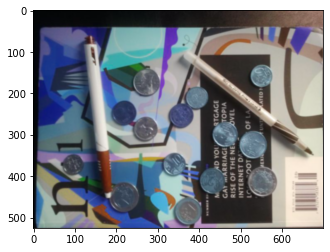

In [63]:
# Reading the Input Image
clutter_img        = cv.imread('../data/proj2-clutter-image.jpg')

##############################
# TO DO: Your Implementation
##############################
g_kernel   = Gaussian_Filter(1)

# Smoothing the image with the Gaussian Filter
clutter_smooth_img = cv.filter2D(clutter_img, -1, g_kernel)
# clutter_smooth_img=clutter_img
################################
# Your Implementation ENDS here
################################

# Saves the Smooth Image in the result directory
cv.imwrite("../results/Ques_3/proj2-clutter-image-smoothed.png", clutter_smooth_img)

# Plots the smoothed image in the notebook
plt.figure(); plt.imshow(clutter_smooth_img.astype(np.uint8));

#### 3.2 Identify the edges in the smooth image, generated in the previous step. You can use the solution of Ques 1.2. Save the numpy array as clutter_smooth_img_gray_edge.

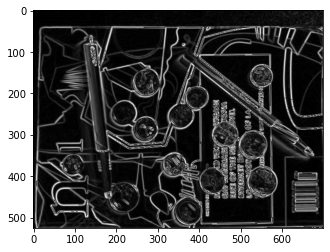

In [64]:
##############################
# TO DO: Your Implementation
##############################
clutter_smooth_img_gray = rgb2gray(clutter_smooth_img)

sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array(np.fliplr(sobel_x).transpose())

clutter_smooth_img_gray_x = cv.filter2D(clutter_smooth_img_gray, -1, sobel_x)
clutter_smooth_img_gray_y = cv.filter2D(clutter_smooth_img_gray, -1, sobel_y)

clutter_smooth_img_gray_edge = np.sqrt(clutter_smooth_img_gray_x**2 + clutter_smooth_img_gray_y**2)
################################
# Your Implementation ENDS here
################################

# Save the Image
cv.imwrite('../results/Ques_3/clutter_smooth_img_gray_edge.png', clutter_smooth_img_gray_edge)

#Plot the Image
plt.figure(); plt.imshow(clutter_smooth_img_gray_edge.astype(np.uint8), cmap='gray');

#### 3.3 Identify the lines in the Image using Hough Transform

Text(0.5, 1.0, 'Binary Image')

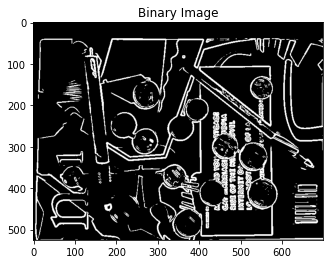

In [65]:
# Invoke the Hough Transform Method to Extract the Lines from the Image
# You need to find a resaonable estimate of the threshold for generating a binary image
# which is good enough for the Hough transform to extract the lines
# To expedite the process you can play with the resolution of the theta and rho 
# without compromising the quality of the results
threshold=100
theta_res=1 
rho_res=1
clutter_smooth_accumulator, clutter_smooth_thetas, clutter_smooth_rhos, clutter_smooth_binary_img = hough_transform(clutter_smooth_img_gray_edge, threshold, theta_res, rho_res)

# Save the Thresholded Binary Image
cv.imwrite('../results/Ques_3/Clutter_Smooth_Binary_Image.png', clutter_smooth_binary_img)

#Plot the Binary Image
plt.figure(); plt.imshow(clutter_smooth_binary_img.astype(np.uint8), cmap='gray'); plt.title('Binary Image')

#### 3.4 Draw the detected lines

In [78]:

acc_threshold=8
plot_lines('../results/Ques_3/proj2-clutter-image-smoothed.png', clutter_smooth_accumulator, clutter_smooth_thetas, clutter_smooth_rhos, acc_threshold, save_path='../results/Ques_3/Clutter_Smooth_Image_Output_Lines.png') 

#### 3.5 Most likely the last exercise produced several lines which DO NOT repesent the boundaries of the pens. How do you take care of the probem? Discuss.

We can take care of the extra lines by optimizing the threshold in the hough tranform as well as while plotting the lines. An optimum threshold should give only the required lines.

#### 3.6 Find the edges which represents only the boundaries of the pens and plot it on the smooth version of the clutter image. 
You need to write a function similar to plot_edges() (but NOT the same).  You will need to check the length of each segment of the line and select only the ones that are above a certain threshold length.  

Save the output image as <b>'../results/Ques_3/Clutter_Smooth_Image_Output_Edges.png'</b>

In [183]:
def plot_edges(img_path, accumulator, thetas, rhos, acc_threshold, binary_image, save_path):

    '''
    This function plots edges
    This should be used to draw edges along the boundary of the pens
    
    Input:
    1. RGB Image for plotting lines
    2. Accumulator array
    3. Vector of the angle values
    4. Vector of the rho values
    5. Threshold value for selecting lines from the accumulator
    6. Path to save the image with lines drawn on them
    
    '''
    img = cv.imread(img_path)
    indexes = []
    nhood_size=20
    acc1 = np.copy(accumulator)
    for i in range(acc_threshold):
        idx = np.argmax(acc1) 
        acc1_idx = np.unravel_index(idx, acc1.shape)
        indexes.append(acc1_idx)

        idx_y, idx_x = acc1_idx 

        if (idx_x - (nhood_size/2)) < 0: 
            min_x = 0
        else: 
            min_x = idx_x - (nhood_size/2)
            
        if ((idx_x + (nhood_size/2) + 1) > accumulator.shape[1]): 
            max_x = accumulator.shape[1]
        else: 
            max_x = idx_x + (nhood_size/2) + 1

        if (idx_y - (nhood_size/2)) < 0: 
            min_y = 0
        else: 
            min_y = idx_y - (nhood_size/2)
            
        if ((idx_y + (nhood_size/2) + 1) > accumulator.shape[0]): 
            max_y = accumulator.shape[0]
        else: 
            max_y = idx_y + (nhood_size/2) + 1

        for x in range(int(min_x),int(max_x)):
            for y in range(int(min_y), int(max_y)):
                acc1[y, x] = 0

                if (x == min_x or x == (max_x - 1)):
                    accumulator[y, x] = 255
                if (y == min_y or y == (max_y - 1)):
                    accumulator[y, x] = 255
                    
    for i in range(len(indexes)):
        rho = rhos[indexes[i][0]]
        theta = thetas[indexes[i][1]]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho

        x1 = int(x0 + 400*(-b))
        y1 = int(y0 + 400*(a))
        x2 = int(x0 - 300*(-b))
        y2 = int(y0 - 300*(a))
        cv.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        

    cv.imwrite(save_path, img)
    

Text(0.5, 1.0, 'Binary Image')

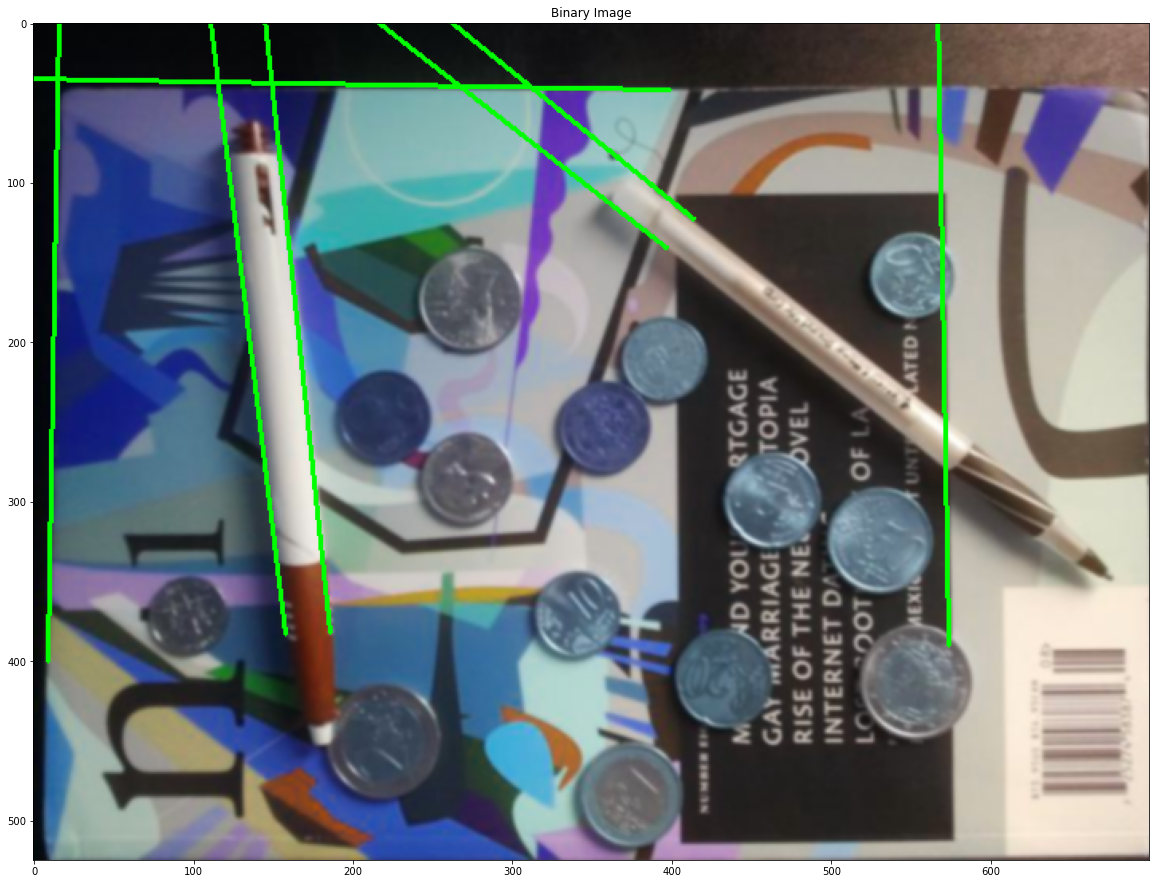

In [184]:
acc_threshold=10
plot_edges('../results/Ques_3/proj2-clutter-image-smoothed.png', clutter_smooth_accumulator, clutter_smooth_thetas, clutter_smooth_rhos, acc_threshold, clutter_smooth_binary_img, save_path='../results/Ques_3/Clutter_Smooth_Image_Output_Edges.png')
img11=cv.imread('../results/Ques_3/Clutter_Smooth_Image_Output_Edges.png')
plt.figure(figsize=(20,20)); plt.imshow(img11.astype(np.uint8)); plt.title('Binary Image') 

### 4. Hough Transform to detect Circles from Cluttered Image (17 points)
In this exercise you are expected to implement Hough Transform for detecting circles from cluttered image. Hough Transform is applied on binary images which can be generated by thresholding the edge detector output.

#### Tasks:
1. Smooth the given image using the Gaussian Filter. Determine the Gaussian filter and comment on its effect in determining the circles. Save the smooth image as <b>clutter_smooth_img_circle_detection</b>, numpy array. <b>(2 points)</b>
2. Identify the edges in the smooth image, generated in the previous step. You can use the solution of <b>Ques 1.2</b>. Save the numpy array as <b>clutter_smooth_img_gray_edge_circle_detection</b>. <b>(2 points)</b>
3. Identify the circles in the Image using Hough Transform. <b>(2 points)</b>
4. Draw the detected circles. <b>(2 points)</b>
5. Did the last solution detect any unwanted circles? If yes, please explain the reason. Which parameters you feel are affecting the result. Moreover, what could be the correct measures to prevent this? <b>(5 points)</b>
6. You are required to find boundaries around atleast 8 coins in the image. <b>(4 points)</b>

#### 4.1 Smooth the given image using the Gaussian Filter. Determine the Gaussian filter and comment on its effect in determining the circles. Save the smooth image as <b>clutter_smooth_img_circle_detection</b>, numpy array.

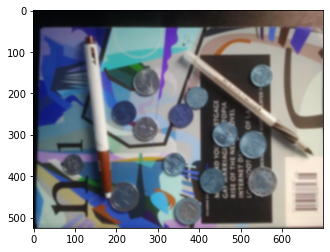

In [89]:
# Reading the Input Image
clutter_img_circle_detection        = cv.imread('../data/proj2-clutter-image.jpg')

##############################
# TO DO: Your Implementation
##############################
g_kernel   = Gaussian_Filter(2)

# Smoothing the image with the Gaussian Filter
clutter_smooth_img_circle_detection = cv.filter2D(clutter_img_circle_detection, -1, g_kernel)


################################
# Your Implementation ENDS here
################################

# Saves the Smooth Image in the result directory
cv.imwrite("../results/Ques_4/proj2-clutter-image-smoothed_circle_detection.png", clutter_smooth_img_circle_detection)

# Plots the smoothed image in the notebook
plt.figure(); plt.imshow(clutter_smooth_img_circle_detection.astype(np.uint8));

Answer:- The higher the sigma is, the edge detection on the smooth edge is too cluttered which interferes while detection of the circle boundaries. We need to tune the remaining parameters ptimaly to be able to extract circles from the image.

#### 4.2 Identify the circles in the smooth image, generated in the previous step. You can use the solution of <b>Ques 1.2</b>. 
Save the numpy array as <b>clutter_smooth_img_gray_edge_circle_detection</b>.

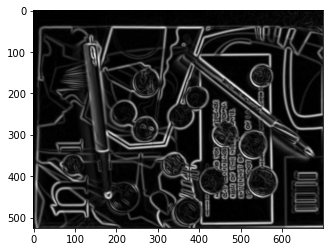

In [90]:
##############################
# TO DO: Your Implementation
##############################

clutter_smooth_img_gray_circle_detection = rgb2gray(clutter_smooth_img_circle_detection)

sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array(np.fliplr(sobel_x).transpose())

clutter_smooth_img_gray_circle_detection_x = cv.filter2D(clutter_smooth_img_gray_circle_detection, -1, sobel_x)
clutter_smooth_img_gray_circle_detection_y = cv.filter2D(clutter_smooth_img_gray_circle_detection, -1, sobel_y)

clutter_smooth_img_gray_edge_circle_detection = np.sqrt(clutter_smooth_img_gray_circle_detection_x**2 + clutter_smooth_img_gray_circle_detection_y**2)

################################
# Your Implementation ENDS here
################################

# Save the Image
cv.imwrite('../results/Ques_4/Smooth_Clutter_Edge_Image_Circle_Detection.png', clutter_smooth_img_gray_edge_circle_detection)

#Plot the Image
plt.figure(); plt.imshow(clutter_smooth_img_gray_edge_circle_detection.astype(np.uint8), cmap='gray');

#### 4.3 Identify the circles in the Image using Hough Transform

In [91]:
# Invoke the Hough Transform Method to Extract the Circles from the Image
# You need to find a resaonable estimate of the threshold for generating a binary image
# which is good enough for the Hough transform to extract circles
# To expedite the process you can play with the resolution parameters 
# without compromising the quality of the results
threshold=100 #160
angle_res=50
min_radius=10#10,
max_radius=250 #250
radius_res=1
clutter_smooth_circle_accumulator, clutter_smooth_circle_radius_vector, clutter_smooth_circle_center_x_vector, clutter_smooth_circle_center_y_vector, clutter_smooth_circle_img_bin = circle_hough_transform(clutter_smooth_img_gray_edge_circle_detection, threshold, min_radius, max_radius, radius_res, angle_res)

# Save the Thresholded Binary Image
cv.imwrite('../results/Ques_4/Smooth_Clutter_Binary_Image_Circle_Detection.png', clutter_smooth_circle_img_bin)

True

#### 4.4 Draw the detected circles

In [92]:
# Plot the Circles extracted on the Clutter Smooth Image
acc_threshold=30
plot_circles('../results/Ques_4/proj2-clutter-image-smoothed_circle_detection.png', clutter_smooth_circle_accumulator, clutter_smooth_circle_radius_vector, clutter_smooth_circle_center_x_vector, clutter_smooth_circle_center_y_vector, acc_threshold, clutter_smooth_circle_img_bin, '../results/Ques_4/Smooth_Clutter_Image_Output_Circles.png')

#### 4.5 Did the last solution detect any unwanted circles? If yes, please explain the reason. Which parameters you feel are affecting the result. Moreover, what could be the correct measures to prevent this?

Yes, the last solution detects several unwante circles. This might be because the cluttered image produces several edges which make it hard to detect the eges clearly.
<br>
<br>
I feel like the thresold, min-max radius parameters in hough_transform greatly influence the results. The threshold helps us control the data pixels which improves the performance of the algorithm. The min-max radius parameters filter out several circles with do not fit the coin sizes. The acc_threshold while plotting the circles also filters out several circles beyond a certain pixel value.
<br>
<br>
I think decreasing the threshold and reducing the maximum radius can remove some of the unwanted circles to and improve circle detection.


#### 4.6 Devise some mechanisms such that you can find boundaries of atleast 8 coins in the image

In [101]:
# New Circle
threshold=90 
angle_res=50
min_radius=10
max_radius=200
radius_res=1
clutter_smooth_circle_accumulator, clutter_smooth_circle_radius_vector, clutter_smooth_circle_center_x_vector, clutter_smooth_circle_center_y_vector, clutter_smooth_circle_img_bin = circle_hough_transform(clutter_smooth_img_gray_edge_circle_detection, threshold, min_radius, max_radius, radius_res, angle_res)

# Save the Thresholded Binary Image
cv.imwrite('../results/Ques_4/Improved_Smooth_Clutter_Binary_Image_Circle_Detection.png', clutter_smooth_circle_img_bin)


True

In [102]:
acc_threshold=30
plot_circles('../results/Ques_4/proj2-clutter-image-smoothed_circle_detection.png', clutter_smooth_circle_accumulator, clutter_smooth_circle_radius_vector, clutter_smooth_circle_center_x_vector, clutter_smooth_circle_center_y_vector, acc_threshold, clutter_smooth_circle_img_bin, '../results/Ques_4/Improved_Smooth_Clutter_Image_Output_Circles.png')

### 5 Test Robustness to Noise (15 points)
In this exercise, we test the robustness of Hough Transform to Gaussian noise.<br>
For this experiment, consider the optimum setting of the parameters (like sigma for smoothing, threshold for binary image, threshold for accumulator and others) for both line and circle detection using Hough Transform.<br>

Then keep adding Gaussian noise to the clutter image, <b>proj2-clutter-image.jpg</b>, starting with sigma value of 5.0 and doubling the sigma at every step, until the detection of lines and circles substantially fails. Mark this value as the of sigma as the failure sigma value.<br>

Between the starting sigma value i.e., 5.0 and the failure sigma value, show sequence of 5 images (equally spaced as per the number of steps) with the detected lines and circles drawn on them where each image represents different sigma value for the Gaussian noise.<br>

With failure sigma value as noise parameter, generate the noisy image and determine a smoothing filter (Gaussian filter as used earlier) to detect lines and circles from the noisy image. Do not change any other parameters used for extraction of lines and circles.

#### Task
1. Starting with sigma value of 5.0 and doubling the sigma at every step determine the sigma when the line and circle detection using Hough Transform fails. <b>(7 points)</b>
2. Plot sequence of 5 images (equally spaced as per the number of steps) with the detected lines or circles drawn on them where each image represents different sigma value for the Gaussian noise. Save the output images separately for circles and lines with the corresponding sigma values. <b>(5 points)</b>
3. Generate a smoothing filter that can handle the maximum noise and help in the detection of lines and circles from the noisy image. Keep the other parameters similar. Save the output images for circles and lines separately. <b>(3 points)</b>

#### Results:
All the output images should be saved in the directory <b>results/Ques_5/</b> with a meaningful name (as used in previous questions). Use the <b>imwrite</b> function in OpenCV library for saving images. You should use the OpenCV <b>line</b> and <b>circle</b> function to draw lines and circles respectively.  Make sure to save the noisy and filtered images you are generating.  

In [130]:
def GaussianNoise(sigma, M, N):
    return (np.random.randn(M, N) * sigma).astype(np.uint8)

In [131]:
line_threshold=120
line_theta_res=1
line_rho_res=1
line_acc_threshold=10

clutter_img = cv.imread("../data/proj2-clutter-image.jpg")
clutter_img_gray = rgb2gray(clutter_img)
clutter_img_gray_height, clutter_img_gray_width = clutter_img_gray.shape

#### Noise 1 (Sigma=5)

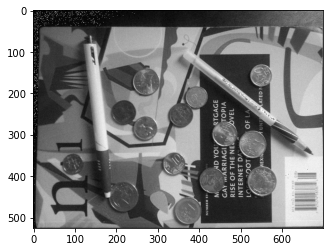

In [132]:
noise1 = GaussianNoise(5,clutter_img_gray_height, clutter_img_gray_width)
noise1_clutter_img = noise1+clutter_img_gray
plt.figure(); plt.imshow(noise1_clutter_img.astype(np.uint8), cmap='gray');

In [133]:
g_kernel   = Gaussian_Filter(2)

noise1_clutter_smooth_img = cv.filter2D(noise1_clutter_img, -1, g_kernel)
cv.imwrite("../results/Ques_5/proj2-noise1-clutter-image-smoothed.png", noise1_clutter_smooth_img)

True

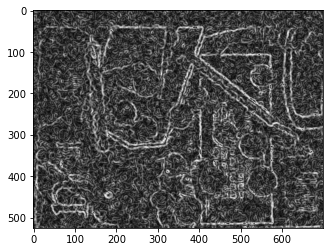

In [134]:
noise1_clutter_smooth_img_gray = noise1_clutter_smooth_img #rgb2gray applied while adding noise

sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array(np.fliplr(sobel_x).transpose())

noise1_clutter_smooth_img_gray_x = cv.filter2D(noise1_clutter_smooth_img_gray, -1, sobel_x)
noise1_clutter_smooth_img_gray_y = cv.filter2D(noise1_clutter_smooth_img_gray, -1, sobel_y)

noise1_clutter_smooth_img_gray_edge = np.sqrt(noise1_clutter_smooth_img_gray_x**2 + noise1_clutter_smooth_img_gray_y**2)

cv.imwrite('../results/Ques_5/noise1_clutter_smooth_img_gray_edge.png', noise1_clutter_smooth_img_gray_edge)

plt.figure(); plt.imshow(noise1_clutter_smooth_img_gray_edge.astype(np.uint8), cmap='gray');

In [118]:
#Line Noise1

In [120]:
noise1_clutter_smooth_img_accumulator, noise1_clutter_smooth_img_thetas, noise1_clutter_smooth_img_rhos, noise1_clutter_smooth_img_binary_img = hough_transform(noise1_clutter_smooth_img_gray_edge, line_threshold, line_theta_res, line_rho_res)

In [222]:
cv.imwrite('../results/Ques_5/Smooth_Noise1_Sigma5_Clutter_Binary_Image_Line.png', noise1_clutter_smooth_img_binary_img)


True

In [125]:
plot_lines('../results/Ques_5/proj2-noise1-clutter-image-smoothed.png', noise1_clutter_smooth_img_accumulator, noise1_clutter_smooth_img_thetas, noise1_clutter_smooth_img_rhos, line_acc_threshold, save_path='../results/Ques_5/Smooth_Noise1_Sigma5_Clutter_Image_Output_Lines.png')
 

In [136]:
#Circle Noise1

In [139]:
threshold=130 
angle_res=50
min_radius=10
max_radius=250 
radius_res=1
noise1_clutter_smooth_circle_accumulator, noise1_clutter_smooth_circle_radius_vector, noise1_clutter_smooth_circle_center_x_vector, noise1_clutter_smooth_circle_center_y_vector, noise1_clutter_smooth_circle_img_bin = circle_hough_transform(noise1_clutter_smooth_img_gray_edge, threshold, min_radius, max_radius, radius_res, angle_res)

cv.imwrite('../results/Ques_5/Smooth_Noise1_Clutter_Binary_Image_Circle_Detection.png', noise1_clutter_smooth_circle_img_bin)

True

In [141]:
acc_threshold=30
plot_circles('../results/Ques_5/proj2-noise1-clutter-image-smoothed.png', clutter_smooth_circle_accumulator, clutter_smooth_circle_radius_vector, clutter_smooth_circle_center_x_vector, clutter_smooth_circle_center_y_vector, acc_threshold, clutter_smooth_circle_img_bin, '../results/Ques_5/Smooth_Noise1_Sigma5_Clutter_Image_Output_Circles.png')

#### Noise 2 (Sigma=10)

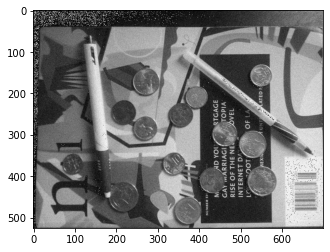

In [142]:
noise2 = GaussianNoise(10,clutter_img_gray_height, clutter_img_gray_width)
noise2_clutter_img = noise2+clutter_img_gray
plt.figure(); plt.imshow(noise2_clutter_img.astype(np.uint8), cmap='gray');

In [143]:
g_kernel   = Gaussian_Filter(2)

noise2_clutter_smooth_img = cv.filter2D(noise2_clutter_img, -1, g_kernel)
cv.imwrite("../results/Ques_5/proj2-noise2-clutter-image-smoothed.png", noise2_clutter_smooth_img)

True

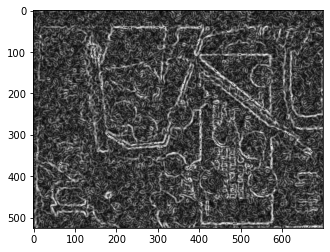

In [144]:
noise2_clutter_smooth_img_gray = noise2_clutter_smooth_img #rgb2gray applied while adding noise

sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array(np.fliplr(sobel_x).transpose())

noise2_clutter_smooth_img_gray_x = cv.filter2D(noise2_clutter_smooth_img_gray, -1, sobel_x)
noise2_clutter_smooth_img_gray_y = cv.filter2D(noise2_clutter_smooth_img_gray, -1, sobel_y)

noise2_clutter_smooth_img_gray_edge = np.sqrt(noise2_clutter_smooth_img_gray_x**2 + noise2_clutter_smooth_img_gray_y**2)
cv.imwrite('../results/Ques_5/noise2_clutter_smooth_img_gray_edge.png', noise2_clutter_smooth_img_gray_edge)

plt.figure(); plt.imshow(noise2_clutter_smooth_img_gray_edge.astype(np.uint8), cmap='gray');

In [ ]:
#Line Noise 2

In [145]:
noise2_clutter_smooth_img_accumulator, noise2_clutter_smooth_img_thetas, noise2_clutter_smooth_img_rhos, noise2_clutter_smooth_img_binary_img = hough_transform(noise2_clutter_smooth_img_gray_edge, line_threshold, line_theta_res, line_rho_res)

In [223]:
cv.imwrite('../results/Ques_5/Smooth_Noise2_Sigma10_Clutter_Binary_Image_Line.png', noise2_clutter_smooth_img_binary_img)


True

In [146]:
plot_lines('../results/Ques_5/proj2-noise2-clutter-image-smoothed.png', noise2_clutter_smooth_img_accumulator, noise2_clutter_smooth_img_thetas, noise2_clutter_smooth_img_rhos, line_acc_threshold, save_path='../results/Ques_5/Smooth_Noise2_Sigma10_Clutter_Image_Output_Lines.png')


In [ ]:
#Circle Noise 2

In [147]:
threshold=130 
angle_res=50
min_radius=10
max_radius=250 
radius_res=1
noise2_clutter_smooth_circle_accumulator, noise2_clutter_smooth_circle_radius_vector, noise2_clutter_smooth_circle_center_x_vector, noise2_clutter_smooth_circle_center_y_vector, noise2_clutter_smooth_circle_img_bin = circle_hough_transform(noise2_clutter_smooth_img_gray_edge, threshold, min_radius, max_radius, radius_res, angle_res)

cv.imwrite('../results/Ques_5/Smooth_Noise2_Clutter_Binary_Image_Circle_Detection.png', noise2_clutter_smooth_circle_img_bin)

True

In [148]:
acc_threshold=30
plot_circles('../results/Ques_5/proj2-noise2-clutter-image-smoothed.png', noise2_clutter_smooth_circle_accumulator, noise2_clutter_smooth_circle_radius_vector, noise2_clutter_smooth_circle_center_x_vector, noise2_clutter_smooth_circle_center_y_vector, acc_threshold, noise2_clutter_smooth_circle_img_bin, '../results/Ques_5/Smooth_Noise2_Sigma10_Clutter_Image_Output_Circles.png')

#### Noise 3 (Sigma=20)

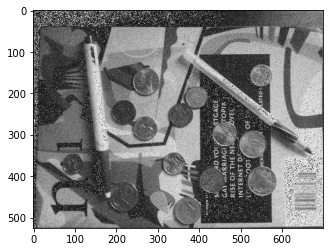

In [149]:
noise3 = GaussianNoise(20,clutter_img_gray_height, clutter_img_gray_width)
noise3_clutter_img = noise3+clutter_img_gray
plt.figure(); plt.imshow(noise3_clutter_img.astype(np.uint8), cmap='gray');

In [150]:
g_kernel   = Gaussian_Filter(2)

noise3_clutter_smooth_img = cv.filter2D(noise3_clutter_img, -1, g_kernel)
cv.imwrite("../results/Ques_5/proj2-noise3-clutter-image-smoothed.png", noise3_clutter_smooth_img)

True

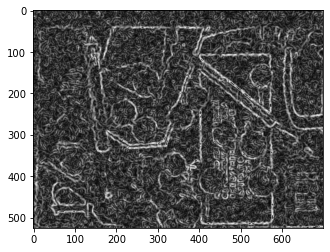

In [151]:
noise3_clutter_smooth_img_gray = noise3_clutter_smooth_img #rgb2gray applied while adding noise

sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array(np.fliplr(sobel_x).transpose())

noise3_clutter_smooth_img_gray_x = cv.filter2D(noise3_clutter_smooth_img_gray, -1, sobel_x)
noise3_clutter_smooth_img_gray_y = cv.filter2D(noise3_clutter_smooth_img_gray, -1, sobel_y)

noise3_clutter_smooth_img_gray_edge = np.sqrt(noise3_clutter_smooth_img_gray_x**2 + noise3_clutter_smooth_img_gray_y**2)
cv.imwrite('../results/Ques_5/noise3_clutter_smooth_img_gray_edge.png', noise3_clutter_smooth_img_gray_edge)

plt.figure(); plt.imshow(noise3_clutter_smooth_img_gray_edge.astype(np.uint8), cmap='gray');

In [ ]:
# Lines 3

In [154]:
noise3_clutter_smooth_img_accumulator, noise3_clutter_smooth_img_thetas, noise3_clutter_smooth_img_rhos, noise3_clutter_smooth_img_binary_img = hough_transform(noise3_clutter_smooth_img_gray_edge, line_threshold, line_theta_res, line_rho_res)

In [224]:
cv.imwrite('../results/Ques_5/Smooth_Noise3_Sigma20_Clutter_Binary_Image_Line.png', noise3_clutter_smooth_img_binary_img)


True

In [155]:
plot_lines('../results/Ques_5/proj2-noise3-clutter-image-smoothed.png', noise3_clutter_smooth_img_accumulator, noise3_clutter_smooth_img_thetas, noise3_clutter_smooth_img_rhos, line_acc_threshold, save_path='../results/Ques_5/Smooth_Noise3_Sigma20_Clutter_Image_Output_Lines.png')


In [ ]:
#Circle3

In [156]:
threshold=130 
angle_res=50
min_radius=10
max_radius=250
radius_res=1
noise3_clutter_smooth_circle_accumulator, noise3_clutter_smooth_circle_radius_vector, noise3_clutter_smooth_circle_center_x_vector, noise3_clutter_smooth_circle_center_y_vector, noise3_clutter_smooth_circle_img_bin = circle_hough_transform(noise3_clutter_smooth_img_gray_edge, threshold, min_radius, max_radius, radius_res, angle_res)

cv.imwrite('../results/Ques_5/Smooth_Noise3_Clutter_Binary_Image_Circle_Detection.png', noise3_clutter_smooth_circle_img_bin)

True

In [157]:
acc_threshold=30
plot_circles('../results/Ques_5/proj2-noise3-clutter-image-smoothed.png', noise3_clutter_smooth_circle_accumulator, noise3_clutter_smooth_circle_radius_vector, noise3_clutter_smooth_circle_center_x_vector, noise3_clutter_smooth_circle_center_y_vector, acc_threshold, noise3_clutter_smooth_circle_img_bin, '../results/Ques_5/Smooth_Noise3_Sigma20_Clutter_Image_Output_Circles.png')

#### Noise 4 (Sigma=40)

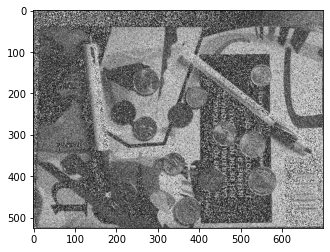

In [159]:
noise4 = GaussianNoise(40,clutter_img_gray_height, clutter_img_gray_width)
noise4_clutter_img = noise4+clutter_img_gray
plt.figure(); plt.imshow(noise4_clutter_img.astype(np.uint8), cmap='gray');

In [160]:
g_kernel   = Gaussian_Filter(2)

noise4_clutter_smooth_img = cv.filter2D(noise4_clutter_img, -1, g_kernel)
cv.imwrite("../results/Ques_5/proj2-noise4-clutter-image-smoothed.png", noise4_clutter_smooth_img)

True

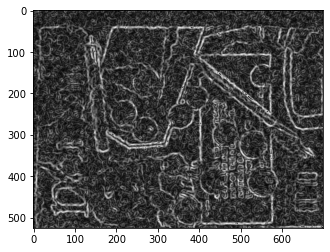

In [161]:
noise4_clutter_smooth_img_gray = noise4_clutter_smooth_img #rgb2gray applied while adding noise

sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array(np.fliplr(sobel_x).transpose())

noise4_clutter_smooth_img_gray_x = cv.filter2D(noise4_clutter_smooth_img_gray, -1, sobel_x)
noise4_clutter_smooth_img_gray_y = cv.filter2D(noise4_clutter_smooth_img_gray, -1, sobel_y)

noise4_clutter_smooth_img_gray_edge = np.sqrt(noise4_clutter_smooth_img_gray_x**2 + noise4_clutter_smooth_img_gray_y**2)
cv.imwrite('../results/Ques_5/noise4_clutter_smooth_img_gray_edge.png', noise4_clutter_smooth_img_gray_edge)

plt.figure(); plt.imshow(noise4_clutter_smooth_img_gray_edge.astype(np.uint8), cmap='gray');

In [162]:
#Lines 4

In [163]:
noise4_clutter_smooth_img_accumulator, noise4_clutter_smooth_img_thetas, noise4_clutter_smooth_img_rhos, noise4_clutter_smooth_img_binary_img = hough_transform(noise4_clutter_smooth_img_gray_edge, line_threshold, line_theta_res, line_rho_res)

In [212]:
cv.imwrite('../results/Ques_5/Smooth_Noise4_Sigma40_Clutter_Image_Binary_Image.png', noise4_clutter_smooth_img_binary_img)


True

In [225]:
plot_lines('../results/Ques_5/proj2-noise4-clutter-image-smoothed.png', noise4_clutter_smooth_img_accumulator, noise4_clutter_smooth_img_thetas, noise4_clutter_smooth_img_rhos, line_acc_threshold, save_path='../results/Ques_5/Smooth_Noise4_Sigma40_Clutter_Output_Line.png')
 

In [ ]:
# Circle 4

In [165]:
threshold=130 
angle_res=50
min_radius=10
max_radius=250 
radius_res=1
noise4_clutter_smooth_circle_accumulator, noise4_clutter_smooth_circle_radius_vector, noise4_clutter_smooth_circle_center_x_vector, noise4_clutter_smooth_circle_center_y_vector, noise4_clutter_smooth_circle_img_bin = circle_hough_transform(noise4_clutter_smooth_img_gray_edge, threshold, min_radius, max_radius, radius_res, angle_res)

cv.imwrite('../results/Ques_5/Smooth_Noise4_Clutter_Binary_Image_Circle_Detection.png', noise4_clutter_smooth_circle_img_bin)

True

In [166]:
acc_threshold=30
plot_circles('../results/Ques_5/proj2-noise4-clutter-image-smoothed.png', noise4_clutter_smooth_circle_accumulator, noise4_clutter_smooth_circle_radius_vector, noise4_clutter_smooth_circle_center_x_vector, noise4_clutter_smooth_circle_center_y_vector, acc_threshold, noise2_clutter_smooth_circle_img_bin, '../results/Ques_5/Smooth_Noise4_Sigma40_Clutter_Image_Output_Circles.png')

#### Noise 5 (Sigma=80)

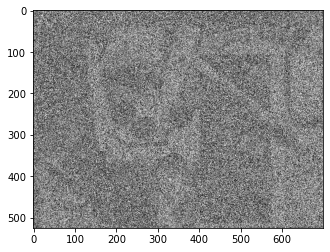

In [235]:
noise5 = GaussianNoise(80,clutter_img_gray_height, clutter_img_gray_width)
noise5_clutter_img = noise5+clutter_img_gray
plt.figure(); plt.imshow(noise5_clutter_img.astype(np.uint8), cmap='gray');


In [236]:
g_kernel   = Gaussian_Filter(3)

noise5_clutter_smooth_img = cv.filter2D(noise5_clutter_img, -1, g_kernel)
cv.imwrite("../results/Ques_5/proj2-noise5-clutter-image-smoothed.png", noise5_clutter_smooth_img)

True

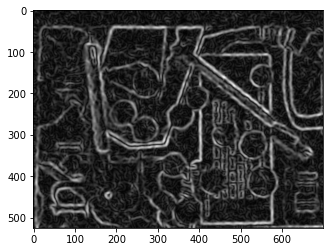

In [237]:
noise5_clutter_smooth_img_gray = noise5_clutter_smooth_img #rgb2gray applied while adding noise

sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array(np.fliplr(sobel_x).transpose())

noise5_clutter_smooth_img_gray_x = cv.filter2D(noise5_clutter_smooth_img_gray, -1, sobel_x)
noise5_clutter_smooth_img_gray_y = cv.filter2D(noise5_clutter_smooth_img_gray, -1, sobel_y)

noise5_clutter_smooth_img_gray_edge = np.sqrt(noise5_clutter_smooth_img_gray_x**2 + noise5_clutter_smooth_img_gray_y**2)
cv.imwrite('../results/Ques_5/noise5_clutter_smooth_img_gray_edge.png', noise5_clutter_smooth_img_gray_edge)

plt.figure(); plt.imshow(noise5_clutter_smooth_img_gray_edge.astype(np.uint8), cmap='gray');

In [ ]:
##Lines 5

In [188]:
noise5_clutter_smooth_img_accumulator, noise5_clutter_smooth_img_thetas, noise5_clutter_smooth_img_rhos, noise5_clutter_smooth_img_binary_img = hough_transform(noise5_clutter_smooth_img_gray_edge, line_threshold, line_theta_res, line_rho_res)

In [238]:
cv.imwrite('../results/Ques_5/Smooth_Noise5_Sigma80_Clutter_Binary_Image_Line.png', noise5_clutter_smooth_img_binary_img)


True

In [239]:
plot_lines('../results/Ques_5/proj2-noise5-clutter-image-smoothed.png', noise5_clutter_smooth_img_accumulator, noise5_clutter_smooth_img_thetas, noise5_clutter_smooth_img_rhos, line_acc_threshold, save_path='../results/Ques_5/Smooth_Noise5_Sigma80_Clutter_Image_Output_Lines.png')


In [ ]:
## Circle 5

In [190]:
threshold=130
angle_res=50
min_radius=10
max_radius=250 
radius_res=1
noise5_clutter_smooth_circle_accumulator, noise5_clutter_smooth_circle_radius_vector, noise5_clutter_smooth_circle_center_x_vector, noise5_clutter_smooth_circle_center_y_vector, noise5_clutter_smooth_circle_img_bin = circle_hough_transform(noise5_clutter_smooth_img_gray_edge, threshold, min_radius, max_radius, radius_res, angle_res)



True

In [240]:
cv.imwrite('../results/Ques_5/Smooth_Noise5_Clutter_Binary_Image_Circle_Detection.png', noise5_clutter_smooth_circle_img_bin)

True

In [241]:
acc_threshold=30
plot_circles('../results/Ques_5/proj2-noise5-clutter-image-smoothed.png', noise5_clutter_smooth_circle_accumulator, noise5_clutter_smooth_circle_radius_vector, noise5_clutter_smooth_circle_center_x_vector, noise5_clutter_smooth_circle_center_y_vector, acc_threshold, noise5_clutter_smooth_circle_img_bin, '../results/Ques_5/Smooth_Noise5_Sigma80_Clutter_Image_Output_Circles.png')

### The Sigma of Failure is 80

## 5.2

<Figure size 432x288 with 0 Axes>

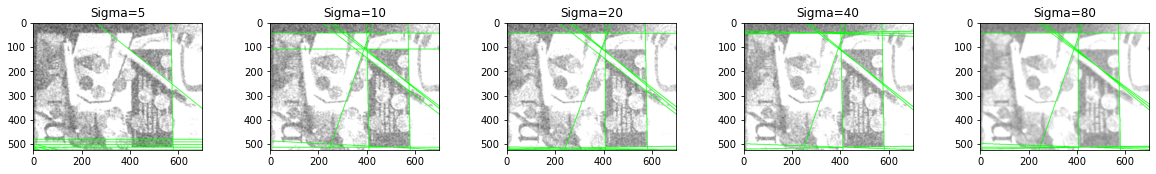

In [216]:
#Line Subplots
plt.figure();
n1=cv.imread("../results/Ques_5/Smooth_Noise1_Sigma5_Clutter_Image_Output_Lines.png")
n2=cv.imread("../results/Ques_5/Smooth_Noise2_Sigma10_Clutter_Image_Output_Lines.png")
n3=cv.imread("../results/Ques_5/Smooth_Noise3_Sigma20_Clutter_Image_Output_Lines.png")
n4=cv.imread("../results/Ques_5/Smooth_Noise4_Sigma40_Clutter_Image_Output_Lines.png")
n5=cv.imread("../results/Ques_5/Smooth_Noise5_Sigma80_Clutter_Image_Output_Lines.png")


fig,(var1,var2,var3,var4,var5) =  plt.subplots(1, 5, figsize=(20, 20))
var1.title.set_text("Sigma=5")
var1.imshow(n1.astype(np.uint8));
var2.title.set_text("Sigma=10")
var2.imshow(n2.astype(np.uint8));
var3.title.set_text("Sigma=20")
var3.imshow(n3.astype(np.uint8));
var4.title.set_text("Sigma=40")
var4.imshow(n4.astype(np.uint8));
var5.title.set_text("Sigma=80")
var5.imshow(n5.astype(np.uint8));
plt.subplots_adjust(wspace=0.4)

plt.savefig("../results/Ques_5/Subplot_Noise_Clutter_Image_Output_Lines.png")

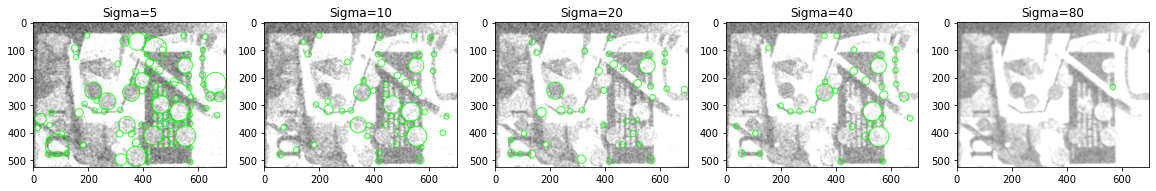

In [221]:
# Circle Subplots
n1 = cv.imread('../results/Ques_5/Smooth_Noise1_Sigma5_Clutter_Image_Output_Circles.png')
n2 = cv.imread('../results/Ques_5/Smooth_Noise2_Sigma10_Clutter_Image_Output_Circles.png')
n3  =cv.imread('../results/Ques_5/Smooth_Noise3_Sigma20_Clutter_Image_Output_Circles.png')
n4  =cv.imread('../results/Ques_5/Smooth_Noise4_Sigma40_Clutter_Image_Output_Circles.png')
n5  =cv.imread('../results/Ques_5/Smooth_Noise5_Sigma80_Clutter_Image_Output_Circles.png')
fig,(var1,var2,var3,var4,var5) =  plt.subplots(1, 5, figsize=(20, 20))
var1.title.set_text("Sigma=5")
var1.imshow(n1.astype(np.uint8));
var2.title.set_text("Sigma=10")
var2.imshow(n2.astype(np.uint8));
var3.title.set_text("Sigma=20")
var3.imshow(n3.astype(np.uint8));
var4.title.set_text("Sigma=40")
var4.imshow(n4.astype(np.uint8));
var5.title.set_text("Sigma=80")
var5.imshow(n5.astype(np.uint8));
plt.subplots_adjust(wspace=0.2)

plt.savefig("../results/Ques_5/Subplot_Noise_Clutter_Image_Output_Circles.png")

## 5.3

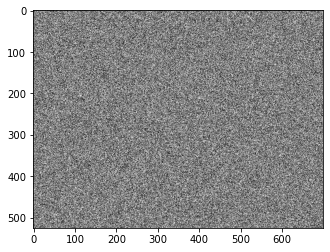

In [242]:
max_noise = GaussianNoise(160,clutter_img_gray_height, clutter_img_gray_width)
max_noise_clutter_img = clutter_img_gray+max_noise
plt.figure(); plt.imshow(max_noise_clutter_img.astype(np.uint8), cmap='gray');

In [243]:
g_kernel   = Gaussian_Filter(4)

max_noise_clutter_smooth_img = cv.filter2D(max_noise_clutter_img, -1, g_kernel)
cv.imwrite("../results/Ques_5/proj2-max-noise-clutter-image-smoothed.png", max_noise_clutter_smooth_img)

True

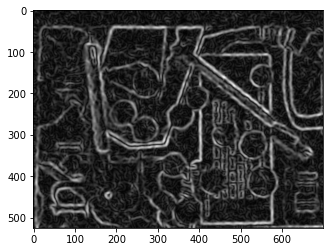

In [244]:
max_noise_clutter_smooth_img_gray = max_noise_clutter_smooth_img #rgb2gray applied while adding noise

sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array(np.fliplr(sobel_x).transpose())

max_noise_clutter_smooth_img_gray_x = cv.filter2D(max_noise_clutter_smooth_img_gray, -1, sobel_x)
max_noise_clutter_smooth_img_gray_y = cv.filter2D(max_noise_clutter_smooth_img_gray, -1, sobel_y)

max_noise_clutter_smooth_img_gray_edge = np.sqrt(max_noise_clutter_smooth_img_gray_x**2 + max_noise_clutter_smooth_img_gray_y**2)
cv.imwrite("../results/Ques_5/max_noise_clutter_smooth_img_gray_edge.png", max_noise_clutter_smooth_img_gray_edge)
plt.figure(); plt.imshow(noise5_clutter_smooth_img_gray_edge.astype(np.uint8), cmap='gray');

In [245]:
max_noise_clutter_smooth_img_accumulator, max_noise_clutter_smooth_img_thetas, max_noise_clutter_smooth_img_rhos, max_noise_clutter_smooth_img_binary_img = hough_transform(max_noise_clutter_smooth_img_gray_edge, line_threshold, line_theta_res, line_rho_res)

In [246]:
cv.imwrite('../results/Ques_5/Smooth_Max_Noise_Clutter_Binary_Image_Line.png', max_noise_clutter_smooth_img_binary_img)


True

In [247]:
plot_lines('../results/Ques_5/proj2-max-noise-clutter-image-smoothed.png', max_noise_clutter_smooth_img_accumulator, max_noise_clutter_smooth_img_thetas, max_noise_clutter_smooth_img_rhos, line_acc_threshold, save_path='../results/Ques_5/Smooth_Max_Noise_Sigma160_Clutter_Image_Output_Lines.png')


In [248]:
threshold=130
angle_res=50
min_radius=10
max_radius=250 
radius_res=1
max_noise_clutter_smooth_circle_accumulator, max_noise_clutter_smooth_circle_radius_vector, max_noise_clutter_smooth_circle_center_x_vector, max_noise_clutter_smooth_circle_center_y_vector, max_noise_clutter_smooth_circle_img_bin = circle_hough_transform(max_noise_clutter_smooth_img_gray_edge, threshold, min_radius, max_radius, radius_res, angle_res)



In [249]:
cv.imwrite('../results/Ques_5/Smooth_Max_Noise_Clutter_Binary_Image_Circle_Detection.png', max_noise_clutter_smooth_circle_img_bin)

True

In [251]:
acc_threshold=30
plot_circles('../results/Ques_5/proj2-max-noise-clutter-image-smoothed.png', max_noise_clutter_smooth_circle_accumulator, max_noise_clutter_smooth_circle_radius_vector, max_noise_clutter_smooth_circle_center_x_vector, max_noise_clutter_smooth_circle_center_y_vector, acc_threshold, max_noise_clutter_smooth_circle_img_bin, '../results/Ques_5/Smooth_Max_Noise_Sigma160_Clutter_Image_Output_Circles.png')

### 6 Hough Transform to detect Lines and Circles from a Distorted Image (15 points)
In this exercise you should use your Hough Transform implementation to try and detect lines and circles from the distorted image, <b>proj2-foreshortened-image.jpg</b>. Load the image from the data directory to do all the procesing to extract the lines and circles.


#### Tasks:
1. Plot the edges of the pens and boundaries of the coins, using the functions defined in the previous questions <b>(5 points)</b>
3. How many of the lines and edges in the image did your Hough transform detect? How many additional lines and circles do you see that weren't detected? What differences in appearance, shape, etc. do you notice between those that were and weren't detected? <b>(5 points)</b>
4. Discuss what changes to the alogirhtm you think could help in making the missed lines and circles visible? <b>(5 points)</b>

#### Results:
All the output images should be saved in the directory <b>results/Ques_6/</b> with a meaningful name (as used in previous questions). Use the <b>imwrite</b> function in OpenCV library for saving images. You should use the OpenCV <b>line</b> and <b>circle</b> function to draw lines and circles respectively.

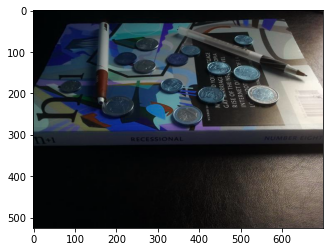

In [103]:
distorted_img        = cv.imread('../data/proj2-foreshortened-image.jpg')

##############################
# TO DO: Your Implementation
##############################
g_kernel   = Gaussian_Filter(0.1)

distorted_smooth_img = cv.filter2D(distorted_img, -1, g_kernel)
################################
# Your Implementation ENDS here
################################

cv.imwrite("../results/Ques_6/proj2-distorted-smooth-img.png", distorted_smooth_img)

plt.figure(); plt.imshow(distorted_smooth_img.astype(np.uint8));

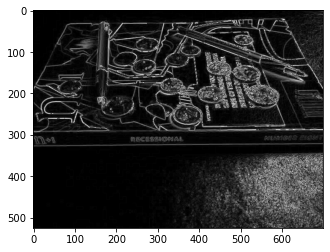

In [104]:
distorted_smooth_img_gray = rgb2gray(distorted_smooth_img)

sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array(np.fliplr(sobel_x).transpose())

distorted_smooth_img_gray_x = cv.filter2D(distorted_smooth_img_gray, -1, sobel_x)
distorted_smooth_img_gray_y = cv.filter2D(distorted_smooth_img_gray, -1, sobel_y)

distorted_smooth_img_gray_edge = np.sqrt(distorted_smooth_img_gray_x**2 + distorted_smooth_img_gray_y**2)
cv.imwrite('../results/Ques_6/distorted_smooth_img_gray_edge.png', distorted_smooth_img_gray_edge)

plt.figure(); plt.imshow(distorted_smooth_img_gray_edge.astype(np.uint8), cmap='gray');

#### Line Detection Distorted Image

In [111]:
threshold=100 
theta_res=1
rho_res=1
distorted_smooth_img_accumulator, distorted_smooth_img_thetas, distorted_smooth_img_rhos, distorted_smooth_img_binary_img = hough_transform(distorted_smooth_img_gray_edge, threshold, theta_res, rho_res)

In [112]:
acc_threshold=20
plot_lines('../results/Ques_6/proj2-distorted-smooth-img.png', distorted_smooth_img_accumulator, distorted_smooth_img_thetas, distorted_smooth_img_rhos, acc_threshold, save_path='../results/Ques_6/Smooth_Distorted_Image_Output_Lines.png')

#### Circle Detection Distorted Image

In [109]:
threshold=160 #160
angle_res=90
min_radius=10#10,
max_radius=250 #250
radius_res=1
distorted_smooth_circle_accumulator, distorted_smooth_circle_radius_vector, distorted_smooth_circle_center_x_vector, distorted_smooth_circle_center_y_vector, distorted_smooth_circle_img_bin = circle_hough_transform(distorted_smooth_img_gray_edge, threshold, min_radius, max_radius, radius_res, angle_res)

cv.imwrite('../results/Ques_6/Smooth_Distorted_Binary_Image_Circle_Detection.png', distorted_smooth_circle_img_bin)

True

In [110]:
acc_threshold=1
plot_circles('../results/Ques_6/proj2-distorted-smooth-img.png', distorted_smooth_circle_accumulator, distorted_smooth_circle_radius_vector, distorted_smooth_circle_center_x_vector, distorted_smooth_circle_center_y_vector, acc_threshold, distorted_smooth_circle_img_bin, '../results/Ques_6/Smooth_Distorted_Image_Output_Circles.png')

## 6.2

##### How many of the lines and edges in the image did your Hough transform detect? How many additional lines and circles do you see that weren't detected? What differences in appearance, shape, etc. do you notice between those that were and weren't detected?

There were 4 lines detected which includes the edge of the pen and the book and 3 circles were detected in the image. The edges of the first pen was not detected and one of the edge of the second pen was not detected. Even the angle of the first vertical pen is changed, due to which maybe. Almost all of the the coins were not detected properly in the image, the neighbourhood of the circles is detected properly but the algorithm is not able to map he boundaries clearlt. The shape appears to be oval/ellipse instead of circle due to the angle of the image. The difference in those that were and weren't detected is the angle.
<br>
<br>



## 6.3

##### Discuss what changes to the alogirhtm you think could help in making the missed lines and circles visible?

I think for the pen we need to tweak the edge detection to be able to detect the pen edges since they are a bit deep due to the angle of the image. Maybe implementing the canny edge detector would work.
<br>
<br>
For the circle/coins I think we will have to significantly change the alogrithm since the coins in the image are more in the shape of an ellipse. So the radius parameter need to be removed and we need to consider the two axis of the ellipse to detect the boundaries.